# Exact solution used in MES runs


We would like to MES the operation

$$
\partial_\rho^4 f
$$

Using cylindrical geometry.

In [1]:
%matplotlib notebook

from sympy import init_printing
from sympy import S
from sympy import sin, cos, tanh, exp, pi, sqrt

from boutdata.mms import x, y, z, t
from boutdata.mms import DDX

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../')
# Sys path is a list of system paths
sys.path.append(common_dir)
from CELMAPy.MES import get_metric, make_plot, BOUT_print

init_printing()

## Initialize

In [2]:
folder = '../gaussian/'
metric = get_metric()

## Define the variables

In [3]:
# Initialization
the_vars = {}

### Define the function to take the derivative of

**NOTE**:

1. z must be periodic
2. The field $f(\rho, \theta)$ must be of class infinity in $z=0$ and $z=2\pi$
3. The field $f(\rho, \theta)$ must be single valued when $\rho\to0$
4. The field $f(\rho, \theta)$ must be continuous in the $\rho$ direction with $f(\rho, \theta + \pi)$
5. Eventual BC in $\rho$ must be satisfied

In [4]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])

In [5]:
# Mixmode
# Mutliply with a mix of modes
# Multiply with a tanh in order to make the variation in x more homogeneous
the_vars['f'] = (((x/(Lx))**3)*\
                cos(2*z)*\
                (
                   cos(2*pi*(x/Lx)) + sin(2*pi*(x/Lx))
                 + cos(3*2*pi*(x/Lx)) + cos(2*2*pi*(x/Lx))                
                )\
                *(1/2)*(1-tanh((1/8)*(x-10))))\
                *(1/2)*(-1+tanh((1/4)*(x-20)))

Calculating the solution

In [6]:
the_vars['S'] = the_vars['f'].diff(x, 4)

## Plot

<IPython.core.display.Javascript object>


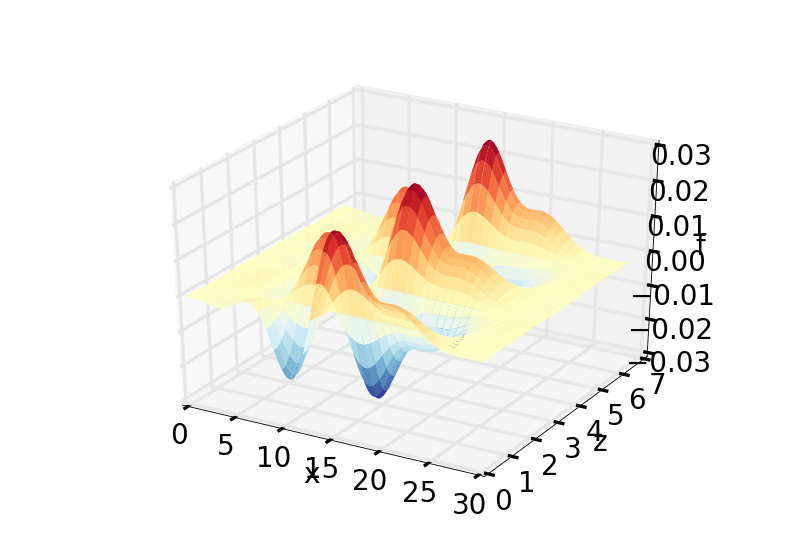

<IPython.core.display.Javascript object>


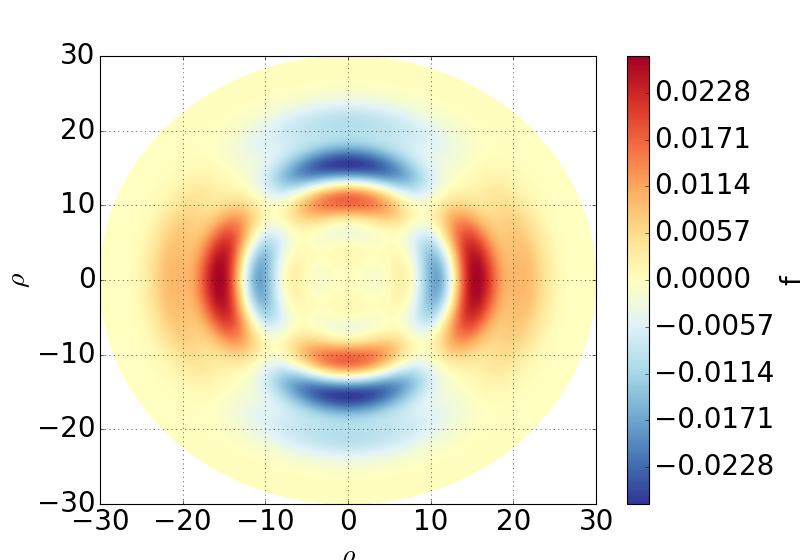

<IPython.core.display.Javascript object>


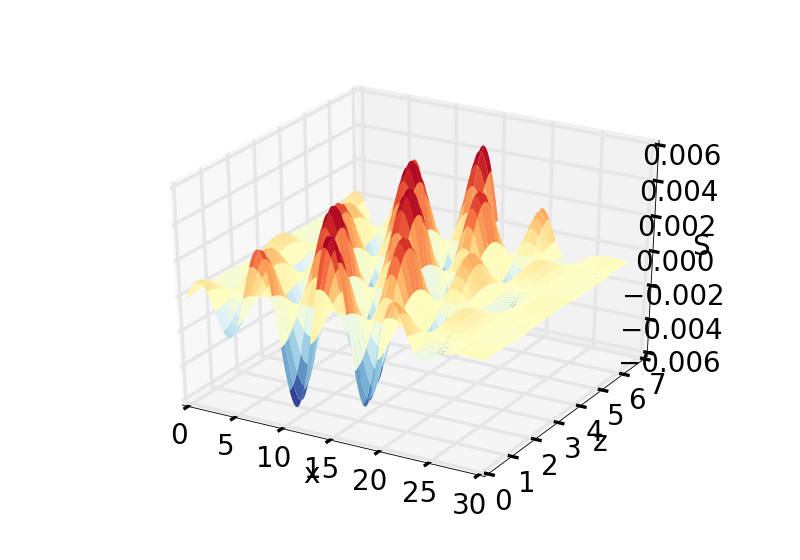

<IPython.core.display.Javascript object>


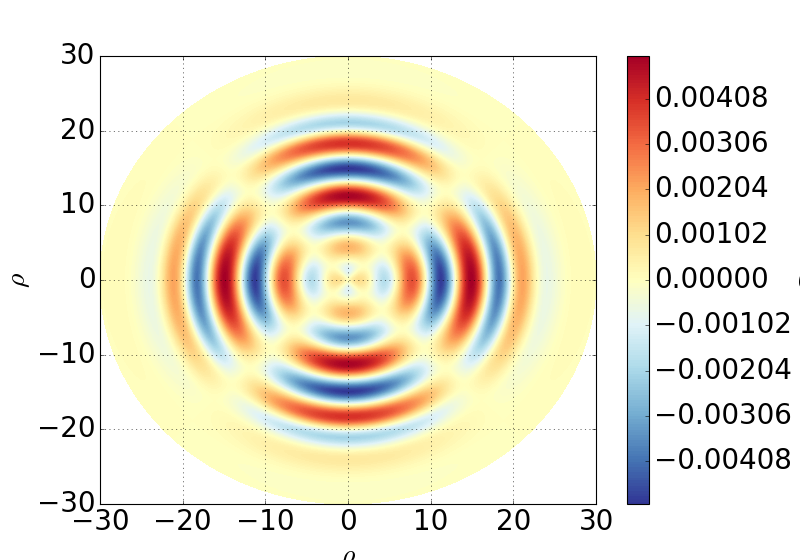

In [7]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False, save=False)

## Print the variables in BOUT++ format

In [8]:
the_vars['neumann'] = the_vars['f'].diff(x)

In [9]:
BOUT_print(the_vars, rational=False)


[f]
9.25925925925926e-6*geom:xl^3*(-tanh(0.125*geom:xl - 1.25) + 1)*(tanh(0.25*geom:xl - 5.0) - 1)*(sin(pi*geom:xl/15) + cos(pi*geom:xl/15) + cos(2*pi*geom:xl/15) + cos(pi*geom:xl/5))*cos(2*z)

[neumann]
9.25925925925926e-6*geom:xl^3*(-tanh(0.125*geom:xl - 1.25) + 1)*(tanh(0.25*geom:xl - 5.0) - 1)*(-pi*sin(pi*geom:xl/15)/15 - 2*pi*sin(2*pi*geom:xl/15)/15 - pi*sin(pi*geom:xl/5)/5 + pi*cos(pi*geom:xl/15)/15)*cos(2*z) + 9.25925925925926e-6*geom:xl^3*(-tanh(0.125*geom:xl - 1.25) + 1)*(-0.25*tanh(0.25*geom:xl - 5.0)^2 + 0.25)*(sin(pi*geom:xl/15) + cos(pi*geom:xl/15) + cos(2*pi*geom:xl/15) + cos(pi*geom:xl/5))*cos(2*z) + 9.25925925925926e-6*geom:xl^3*(0.125*tanh(0.125*geom:xl - 1.25)^2 - 0.125)*(tanh(0.25*geom:xl - 5.0) - 1)*(sin(pi*geom:xl/15) + cos(pi*geom:xl/15) + cos(2*pi*geom:xl/15) + cos(pi*geom:xl/5))*cos(2*z) + 2.77777777777778e-5*geom:xl^2*(-tanh(0.125*geom:xl - 1.25) + 1)*(tanh(0.25*geom:xl - 5.0) - 1)*(sin(pi*geom:xl/15) + cos(pi*geom:xl/15) + cos(2*pi*geom:xl/15) + cos(pi*geom:x